In [1]:
%run ./02_data_implementation.ipynb 

Vocab(n_tokens=146230| max_seq_len=79)
Vocab[78807]=устремлялись


In [2]:
import easyocr as e 

In [19]:
%autoreload 2
from model_package.classifiers import LstmClassifier
from utils import read_images_fromfolder, plot_prob_distr
from data_tools import images_to_model_form, texts_to_model_form

from nltk.tokenize import sent_tokenize

import matplotlib.pyplot as plt
import seaborn as sns


import pytorch_lightning as pl
import torch 
from torch import nn 

In [4]:
sns.set()

In [5]:
import warnings 
warnings.filterwarnings(action='ignore', category=pl.utilities.warnings.PossibleUserWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

### 01. Text author prediction (input=image)

In [6]:
## create reader for images: 
reader = e.Reader(['ru'])

## loading trained weights from 03.____.ipynb
net = LstmClassifier(embedding_dim=300,
                     hidden_size=128,
                     num_layers=2,
                     bidirectional=True,
                     rnn_dropout=0.2,
                     vocab=vocab,
                     loss_fn=nn.CrossEntropyLoss(),
                     )

net.load_state_dict(torch.load("trained_models/LstmClassifier.pth"))

<All keys matched successfully>

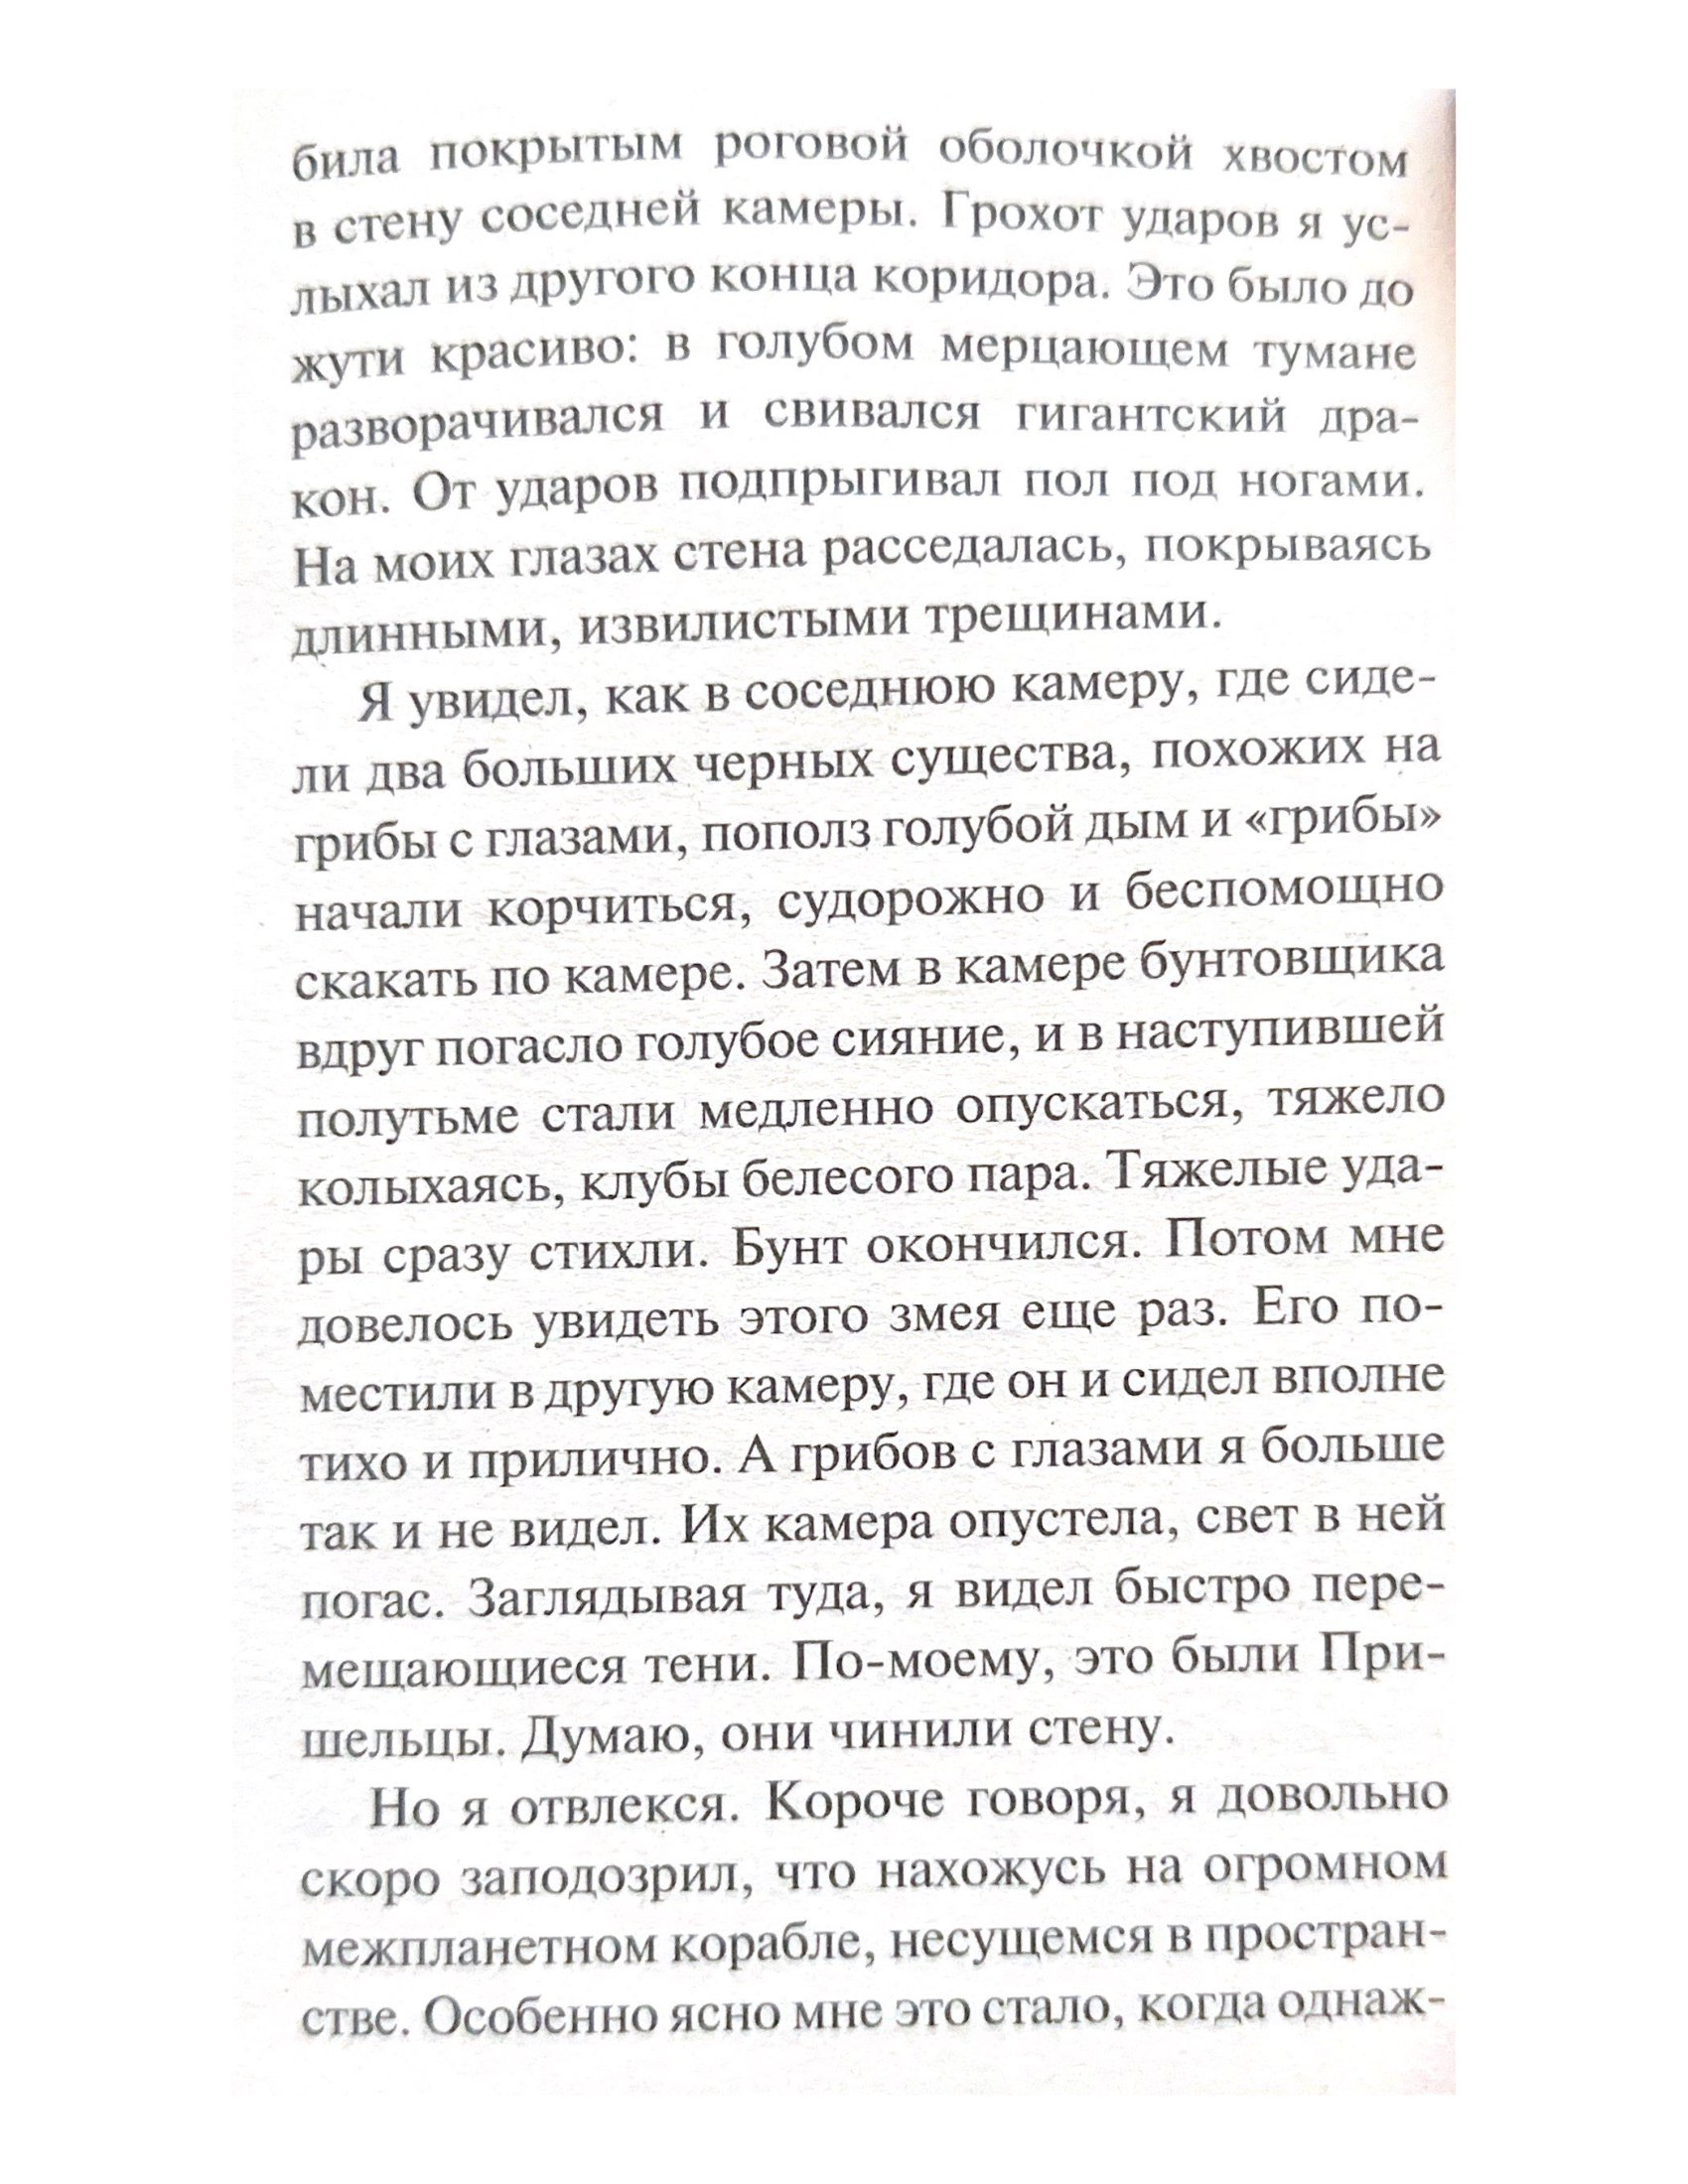

In [7]:
## real author: Strugatskie:
images = read_images_fromfolder('image_examples')
images[2]

In [8]:
## net was trained for {window=5}
X = images_to_model_form(images, vocab=vocab,
                         reader=reader, 
                         window=5)

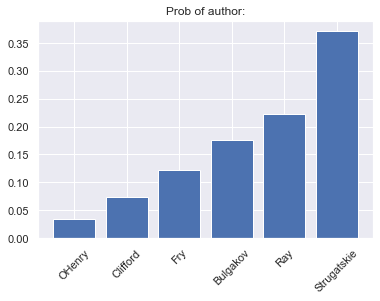

In [11]:
plot_prob_distr(net, vocab, X)

### 02. Text author prediction (input=text)

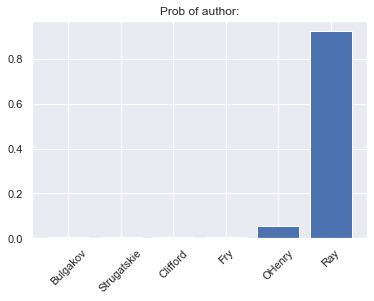

In [49]:
## ray bradbury text:

text = """что-нибудь случится с Гаррисом, вы будете Екклесиаст. 
Видите, каким нужным человеком вы успели стать в последнюю минуту!
Они шли вдоль реки, направляясь на юг. Монтэг пытался разглядеть лица своих 
спутников, старые, изборожденные морщинами, усталые лица, которые он видел у костра. 
Он искал на них выражение радости, решимости, торжества над будущим. 
Он, кажется, ожидал, что от тех знаний, которые они несли в себе, 
их лица будут светиться, как зажженный фонарь в ночном мраке.
 Но ничего этого он"""

X = texts_to_model_form(sent_tokenize(text), vocab, window=5)

plot_prob_distr(net, vocab, X)